In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.8 MB/s 


In [3]:
import numpy as np
import pandas as pd
import pickle5 as pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss

def p_score(true, p_pred):
  # acu roc
  fpr, tpr, thres = roc_curve(true, p_pred)
  auc_score=auc(fpr, tpr)
  logloss=log_loss(true, p_pred)
  print('auc_score :',auc_score,'/','logloss :',logloss)

def b_score(true, b_pred):
  f1=f1_score(true, b_pred)
  recall=recall_score(true, b_pred)
  precision=precision_score(true, b_pred)
  acc=accuracy_score(true, b_pred)
  print('precision :',precision, '/', 'recall :',recall,'/', 'f1 score :', f1,'/', ' acc :', acc)

def data_distribution_plot(data_x,data_y):
  f, a = plt.subplots(1,3, figsize=(30,5))
  sns.distplot(pd.DataFrame(data_x).mean(axis=0), ax=a[0])
  a[0].set_title('histogram mean', fontsize=20)
  sns.scatterplot(y=pd.DataFrame(data_x[data_y==0]).mean(axis=0).values, x=range(data_x.shape[1]), ax=a[1], label='y = 0')
  sns.scatterplot(y=pd.DataFrame(data_x[data_y==1]).mean(axis=0).values, x=range(data_x.shape[1]), ax=a[1], label='y = 1')
  a[1].set_title('scatter mean', fontsize=20)
  sns.scatterplot(y=pd.DataFrame(data_x[data_y==0]).std(axis=0).values, x=range(data_x.shape[1]), ax=a[2], label='y = 0')
  sns.scatterplot(y=pd.DataFrame(data_x[data_y==1]).std(axis=0).values, x=range(data_x.shape[1]), ax=a[2], label='y = 1')
  a[2].set_title('scatter std', fontsize=20)
  plt.show()

In [5]:
# target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset1'
# with urllib.request.urlopen(target_url) as handle:
#       train_x = pickle.load(handle)
#       train_y = pickle.load(handle)

In [6]:
import urllib.request
target_path = f'/content/drive/MyDrive/Colab_Notebooks/master/2022_1/AI_programming/data/Dataset1'

with open(target_path, 'rb') as handle:
    train_x = pickle.load(handle)
    train_y = pickle.load(handle)
    test_x = pickle.load(handle)
    test_y = pickle.load(handle)

In [7]:
print('train x :',train_x.shape,'train y :',train_y.shape,'test x :',test_x.shape,'test y :',test_y.shape)

train x : (700, 200) train y : (700,) test x : (350, 200) test y : (350,)


* train

In [8]:
pd.DataFrame(train_x).describe()

0           1           2           3           4           5    \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean    54.881171   57.491958   57.177286   55.778319   54.248505   55.394756   
std     31.384025   31.880266   31.460504   31.551710   31.479992   31.718558   
min      0.044094    0.025019    0.176618    0.033062    0.116331    0.254780   
25%     27.780499   28.845599   29.789997   28.094205   27.665420   27.796270   
50%     54.853399   60.232040   56.638313   55.571211   52.183521   55.577610   
75%     81.329162   85.302024   85.264491   84.016243   80.978105   82.753989   
max    109.724793  109.871930  109.533939  109.982062  109.928072  109.949238   

              6           7           8           9    ...         190  \
count  700.000000  700.000000  700.000000  700.000000  ...  700.000000   
mean    55.567042   55.057602   56.761717   54.178307  ...   53.702969   
std     31.376848   31.550168   31.775826   32.155292  ...   31.271681   
min      0.168716    0.003682    0.125570    0.053025  ...    0.088290   
25%     28.802513   30.131416   29.437913   26.638971  ...   27.094179   
50%     55.212561   54.439230   56.081423   51.608368  ...   54.347618   
75%     82.133354   82.073508   83.557380   81.597819  ...   79.384571   
max    109.929299  109.886996  109.905524  109.980108  ...  109.967163   

              191         192         193         194         195         196  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean    55.714652   55.326935   56.887286   55.690400   54.849212   54.195680   
std     32.723037   32.606592   31.474215   31.790464   31.161183   31.816458   
min      0.164007    0.244064    0.025353    0.041641    0.041308    0.309707   
25%     27.517404   26.739288   31.753079   28.933916   28.375070   26.580130   
50%     54.935432   55.618227   56.079344   56.664144   53.411923   54.503512   
75%     84.484896   83.833329   82.952054   83.239166   82.370566   80.826877   
max    109.798633  109.634521  109.977512  109.681609  109.853936  109.927009   

              197         198         199  
count  700.000000  700.000000  700.000000  
mean    54.671747   53.943152   54.443553  
std     32.137982   31.545635   31.093803  
min      0.035435    0.338516    0.323770  
25%     27.674346   27.841901   28.131220  
50%     54.125307   53.540737   55.680190  
75%     83.126490   81.380110   80.411810  
max    109.742609  109.785848  109.700929  

[8 rows x 200 columns]

In [9]:
pd.Series(train_y).value_counts()

1.0    500
0.0    200
dtype: int64

* test

In [10]:
pd.DataFrame(test_x).describe()

0           1           2           3           4           5    \
count  350.000000  350.000000  350.000000  350.000000  350.000000  350.000000   
mean    54.482960   52.036093   54.200153   54.947179   54.420400   53.727138   
std     31.736288   33.067704   30.577448   32.115934   30.839440   31.189501   
min      0.282326    0.044363    0.176431    0.141226    0.248055    0.488172   
25%     27.329344   21.986342   29.528459   26.976626   29.015637   27.635653   
50%     55.756316   50.069774   53.163053   55.270804   53.046605   51.533079   
75%     82.858345   81.787037   81.030642   83.837146   81.464088   79.834902   
max    109.998623  109.916579  109.752835  109.578489  109.553031  109.902476   

              6           7           8           9    ...         190  \
count  350.000000  350.000000  350.000000  350.000000  ...  350.000000   
mean    57.180270   55.707331   55.027492   53.651246  ...   55.170868   
std     31.271659   32.318542   31.668379   30.919927  ...   31.440434   
min      0.012849    0.030604    0.465940    0.517124  ...    0.082265   
25%     31.405785   27.205646   27.644625   26.800466  ...   30.371385   
50%     60.107839   54.849645   54.864823   52.674655  ...   56.013831   
75%     83.110381   85.572206   82.862616   79.791442  ...   80.798086   
max    109.874347  109.849652  109.725307  109.630000  ...  109.897129   

              191         192         193         194         195         196  \
count  350.000000  350.000000  350.000000  350.000000  350.000000  350.000000   
mean    54.638249   53.843456   51.801046   54.828727   57.336918   54.667604   
std     31.954884   32.032113   33.211257   32.286163   31.213588   31.411634   
min      0.723231    0.144837    0.124768    0.605069    0.556875    0.420474   
25%     26.744421   25.461892   23.513413   26.482462   32.130929   26.703497   
50%     55.079991   53.585225   46.933148   54.605445   56.387020   56.554012   
75%     82.196044   80.459411   83.209164   82.618741   83.911831   81.957423   
max    109.993078  109.789970  109.902130  109.236914  109.965294  109.833034   

              197         198         199  
count  350.000000  350.000000  350.000000  
mean    52.010020   55.232428   53.600919  
std     32.270454   32.786427   31.986818  
min      0.060144    0.830524    0.258813  
25%     23.472368   24.636529   24.516621  
50%     51.354123   56.388579   52.644110  
75%     81.021819   85.392670   83.257131  
max    109.780373  109.939143  109.855599  

[8 rows x 200 columns]

In [11]:
pd.Series(test_y).value_counts()

1.0    250
0.0    100
dtype: int64

In [12]:
all_data = pd.DataFrame(np.concatenate([train_x,test_x]))
all_data['group']=['train' for _ in range(train_x.shape[0])] + ['test' for _ in range(test_x.shape[0])]
all_data['label']=np.concatenate([train_y,test_y])
all_data.head()

0          1           2          3          4           5  \
0  83.791988  89.516814   51.684542  94.784001  27.887720   87.846860   
1  56.555314  58.367754   29.369653  45.882890  69.232395  103.388486   
2  75.386140  43.363780   32.263069  75.596995  64.442820  102.696695   
3  70.221593  42.334821  102.518520  11.475467  59.290673   88.917342   
4  80.849505  24.372385   38.752879  47.609943  19.731947   16.537936   

            6           7           8          9  ...         192        193  \
0  100.113720   31.313485   59.981530  16.214229  ...    1.614490  40.895219   
1   11.482420  108.855717  105.356942  28.637383  ...   27.646415  78.090722   
2   32.116509   49.351241   88.775521  94.416064  ...   34.094573  81.329802   
3   93.033662   19.021564  102.767875  47.252171  ...  103.917824  79.695526   
4    2.745652   80.601331   84.851252  29.871001  ...   97.309101  15.800648   

         194        195        196        197        198         199  group  \
0  51.068318   6.830528  18.252519  47.200935  50.862705   32.553057  train   
1  56.869619  42.159369  79.132341  25.022093  65.972228  105.849955  train   
2  22.524136  98.171024  73.330455  22.052722   7.411550   22.754669  train   
3  10.996176  40.716559  94.437981  90.295652  57.280567  100.168795  train   
4  39.350117  73.734474   0.559082  71.271615  11.001738   83.398576  train   

   label  
0    1.0  
1    0.0  
2    1.0  
3    1.0  
4    1.0  

[5 rows x 202 columns]

#### categorical data 찾기
> 없음

In [13]:
for i in range(train_x.shape[1]):
  if pd.DataFrame(train_x)[i].nunique() < 200:
    print(i,pd.DataFrame(train_x)[i].nunique())

#### 결측치

In [14]:
pd.DataFrame(train_x).isna().sum().sum()

0

### 이상치

* train

In [15]:
outlier={}
outlier_col_idx=[]
for i in range(train_x.shape[1]):
  outlier[i]=get_outlier(pd.DataFrame(train_x),i).values
  if len(outlier[i])>0 :
    outlier_col_idx.append(i)
# outlier

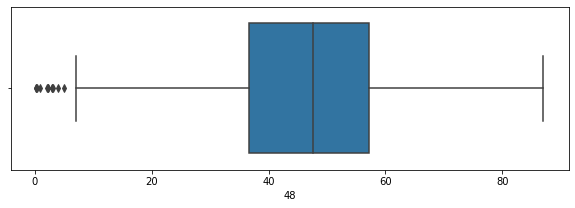

In [16]:
# plt.figure(figsize=(6,6))
plt.figure(figsize=(10,3))
sns.boxplot(pd.DataFrame(train_x).iloc[:,48])
plt.show()

* test

In [17]:
outlier={}
outlier_col_idx=[]
for i in range(test_x.shape[1]):
  outlier[i]=get_outlier(pd.DataFrame(test_x),i).values
  if len(outlier[i])>0 :
    outlier_col_idx.append(i)
# outlier

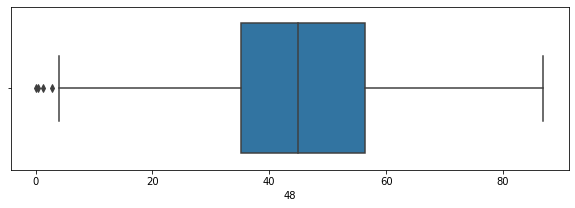

In [18]:
# plt.figure(figsize=(6,6))
plt.figure(figsize=(10,3))
sns.boxplot(pd.DataFrame(test_x).iloc[:,48])
plt.show()

### 상관관계

In [19]:
corr_0=pd.DataFrame(train_x).corr()

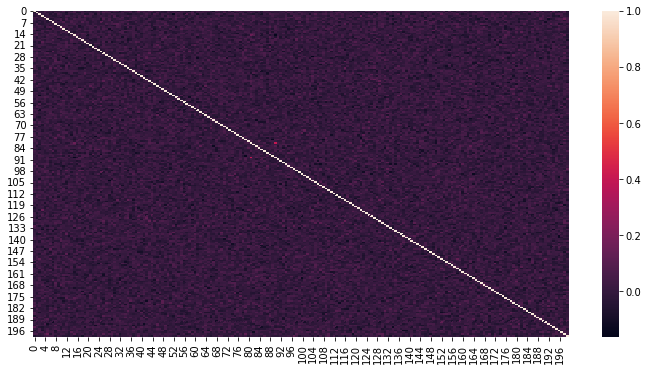

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_0)
plt.show()

In [21]:
corr_0.loc[81][corr_0.loc[81]>0.2]

81    1.000000
90    0.401717
Name: 81, dtype: float64

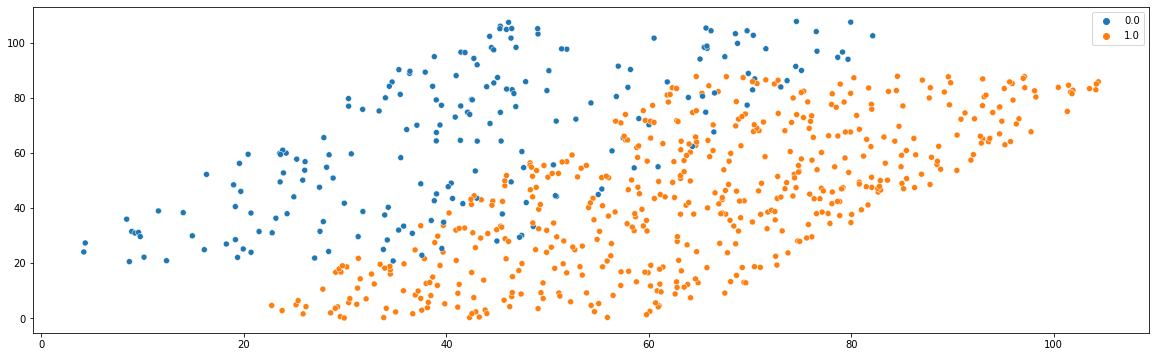

In [22]:
plt.figure(figsize=(20,6))
sns.scatterplot(train_x[:,81],train_x[:,90], hue=train_y)
plt.show()

* train
>15, 27, 48, 81, 90

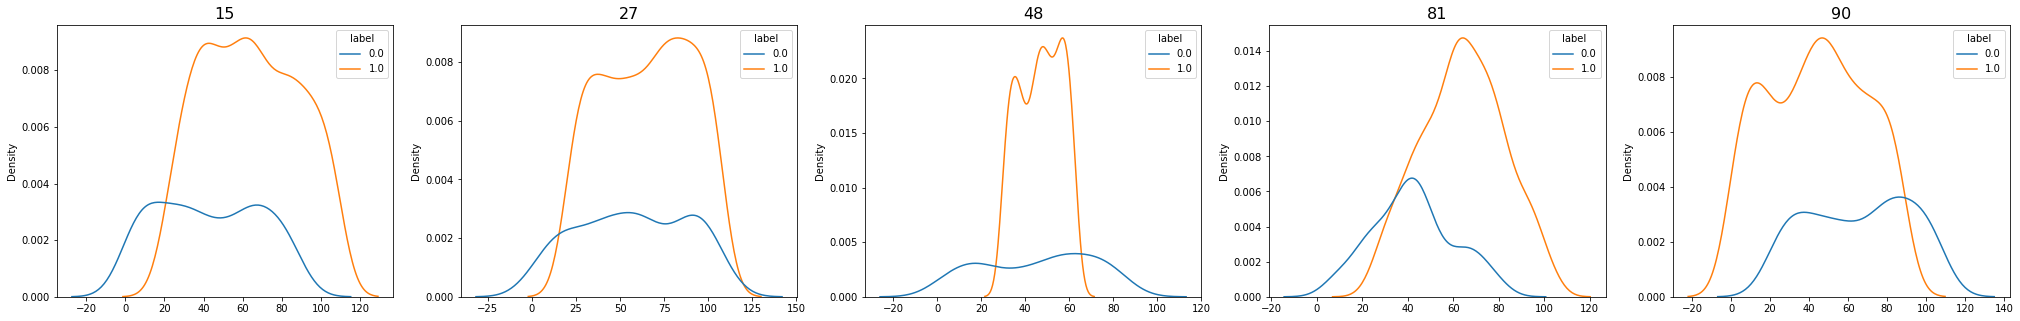

In [23]:
f,a = plt.subplots(1,5,figsize=(35,5))
k=0
target_f=[15,27,48,81,90]
for i in target_f:
  sns.kdeplot(all_data[all_data['group']=='train'][i], hue=all_data[all_data['group']=='train']['label'],ax=a[k])
  a[k].set_title(i,fontsize=16)
  a[k].set(xlabel=None)
  k+=1
plt.show()

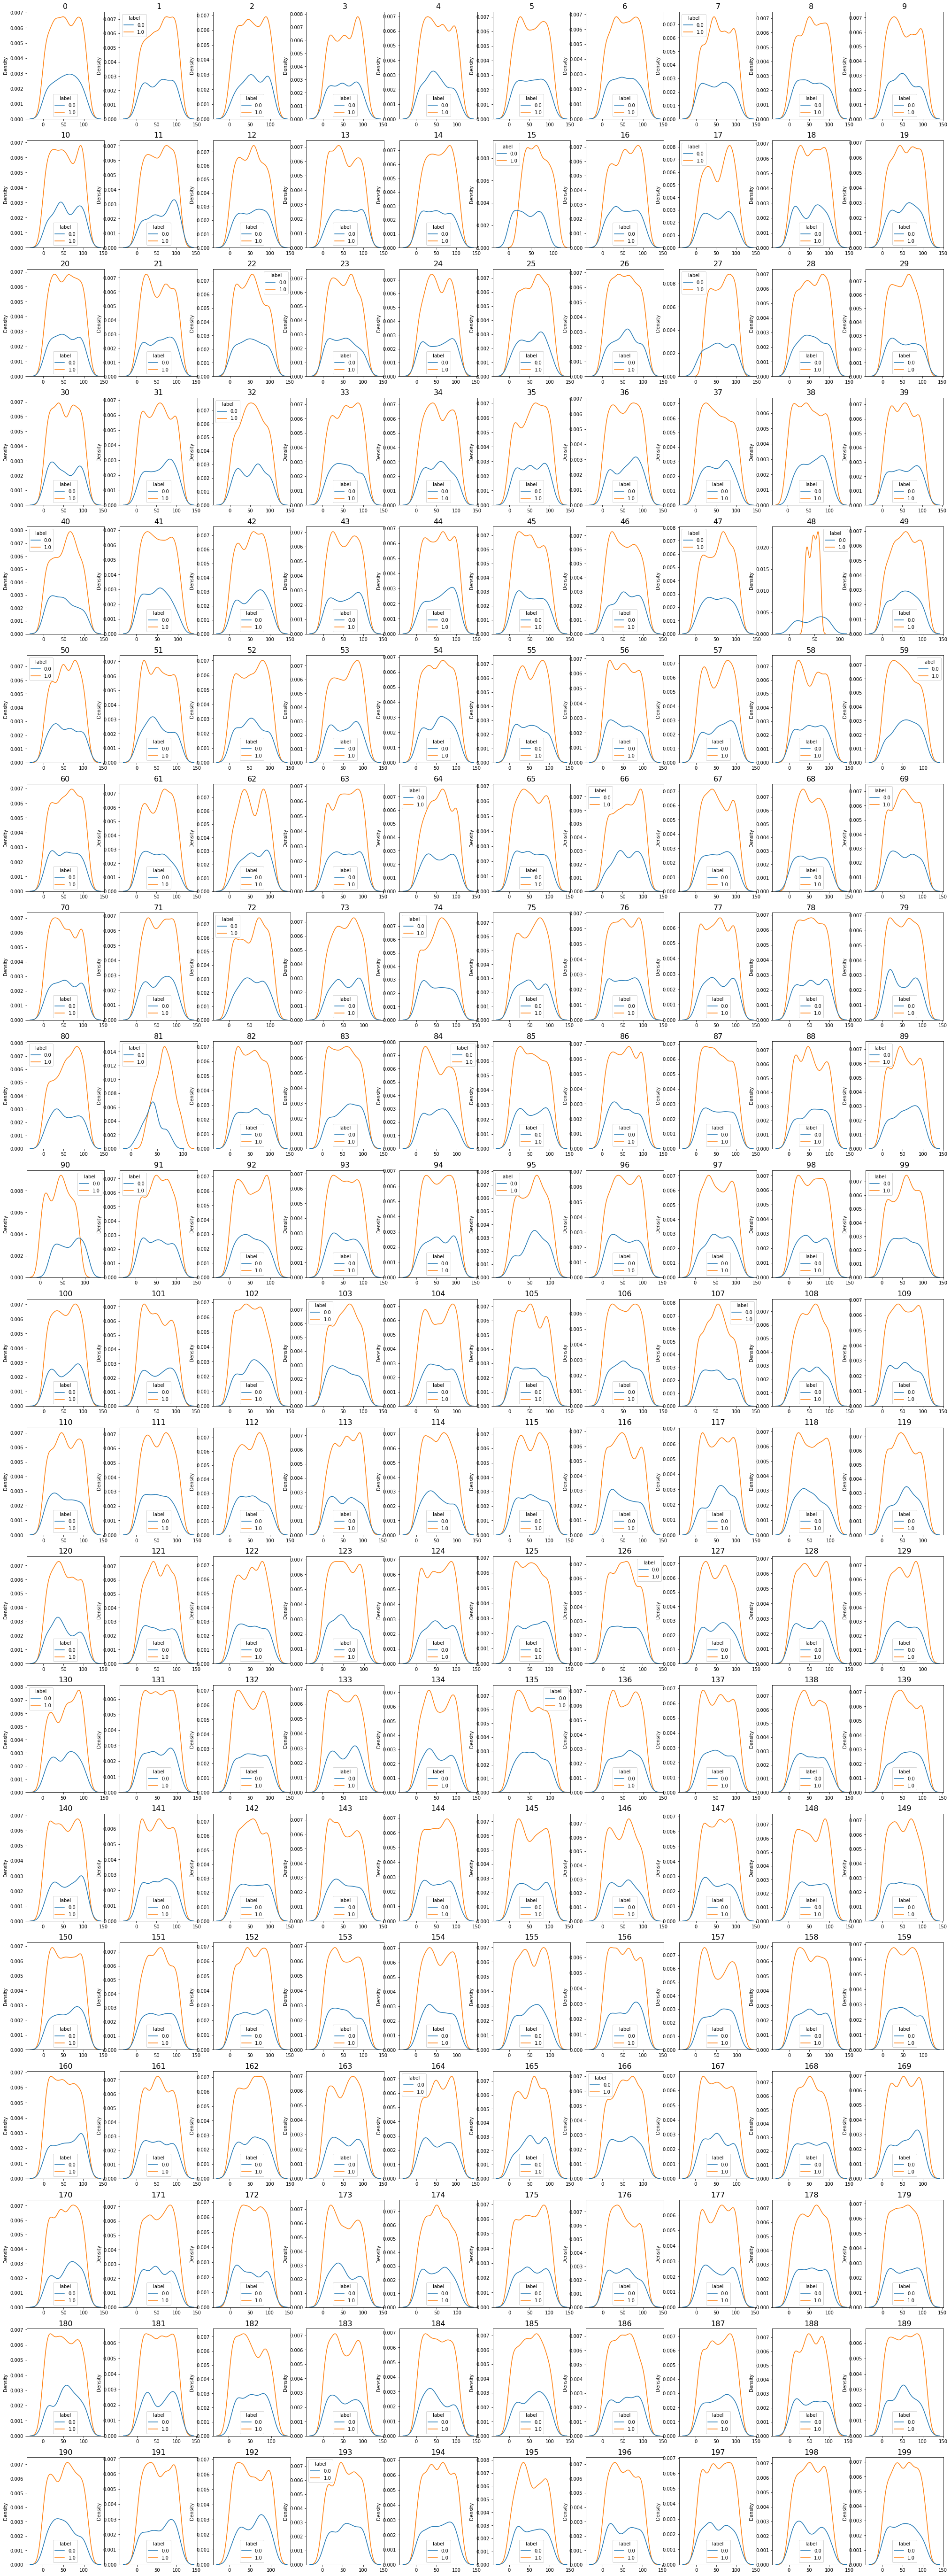

In [24]:
f,a = plt.subplots(20,10,figsize=(35,100))
for i in range(200):
  sns.kdeplot(all_data[all_data['group']=='train'][i], hue=all_data[all_data['group']=='train']['label'],ax=a[i//10][i%10])
  a[i//10][i%10].set_title(i,fontsize=16)
  a[i//10][i%10].set(xlabel=None)
plt.show()

* test
>15, 27, 48, 81, 90

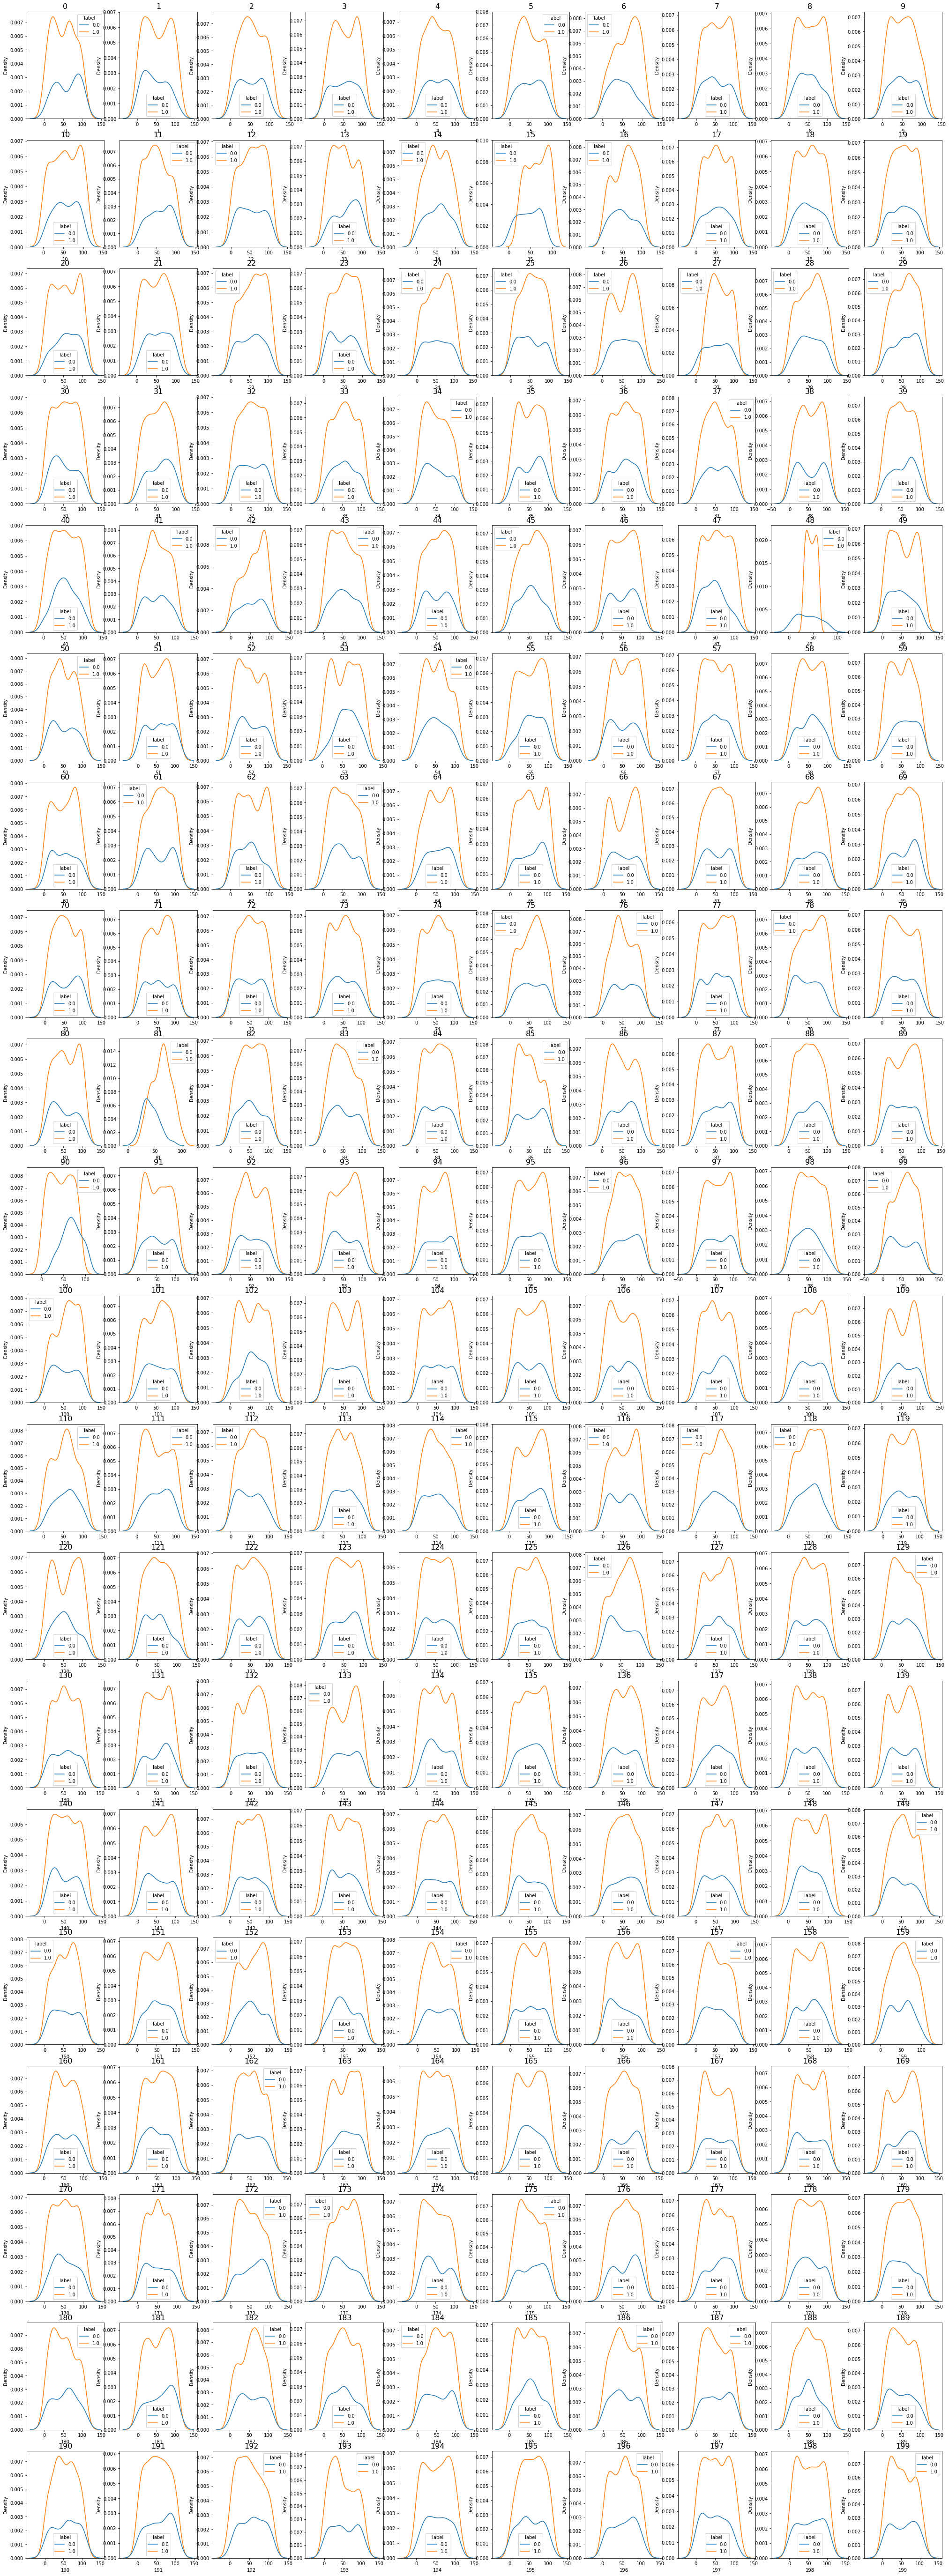

In [25]:
f,a = plt.subplots(20,10,figsize=(35,100))
for i in range(200):
  sns.kdeplot(all_data[all_data['group']=='test'][i], hue=all_data[all_data['group']=='test']['label'],ax=a[i//10][i%10])
  a[i//10][i%10].set_title(i,fontsize=16)
plt.show()

### PCA

### Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
scaled_train_x=scaler.fit_transform(train_x)
scaled_test_x=scaler.transform(test_x)

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=0)
pca_array = pca.fit_transform(scaled_train_x)
pca_df = pd.DataFrame(pca_array, columns=[f"pca{num+1}" for num in range(pca_array.shape[1])])

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(pca_array.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1           2.362625  0.011796  0.011796
pca2           2.262549  0.011297  0.023093
pca3           2.222686  0.011098  0.034190
pca4           2.126003  0.010615  0.044805
pca5           2.105101  0.010510  0.055316
pca6           2.089711  0.010434  0.065749
pca7           2.078431  0.010377  0.076127
pca8           2.040192  0.010186  0.086313
pca9           2.022328  0.010097  0.096410
pca10          1.994544  0.009958  0.106369
pca11          1.975271  0.009862  0.116231
pca12          1.957354  0.009773  0.126004
pca13          1.936457  0.009668  0.135672
pca14          1.914945  0.009561  0.145233
pca15          1.910323  0.009538  0.154771
pca16          1.893726  0.009455  0.164226
pca17          1.849814  0.009236  0.173462
pca18          1.827565  0.009125  0.182587
pca19          1.817166  0.009073  0.191660
pca20          1.792731  0.008951  0.200611
pca21          1.775001  0.008862  0.209473
pca22          1.772384  0.008849  0.218322
pca23          1.750749  0.008741  0.227063
pca24          1.746554  0.008720  0.235784
pca25          1.726762  0.008621  0.244405
pca26          1.717953  0.008577  0.252983
pca27          1.700146  0.008489  0.261471
pca28          1.677743  0.008377  0.269848
pca29          1.659058  0.008283  0.278131
pca30          1.632678  0.008152  0.286283
pca31          1.622092  0.008099  0.294382
pca32          1.615506  0.008066  0.302448
pca33          1.588124  0.007929  0.310377
pca34          1.567649  0.007827  0.318204
pca35          1.557615  0.007777  0.325981
pca36          1.543872  0.007708  0.333690
pca37          1.529316  0.007636  0.341325
pca38          1.509953  0.007539  0.348864
pca39          1.495415  0.007466  0.356331
pca40          1.477764  0.007378  0.363709
pca41          1.443130  0.007205  0.370914
pca42          1.432492  0.007152  0.378067
pca43          1.425725  0.007118  0.385185
pca44          1.397724  0.006979  0.392164
pca45          1.380647  0.006893  0.399057
pca46          1.374822  0.006864  0.405921
pca47          1.370622  0.006843  0.412765
pca48          1.342019  0.006701  0.419465
pca49          1.323056  0.006606  0.426071
pca50          1.301181  0.006497  0.432568

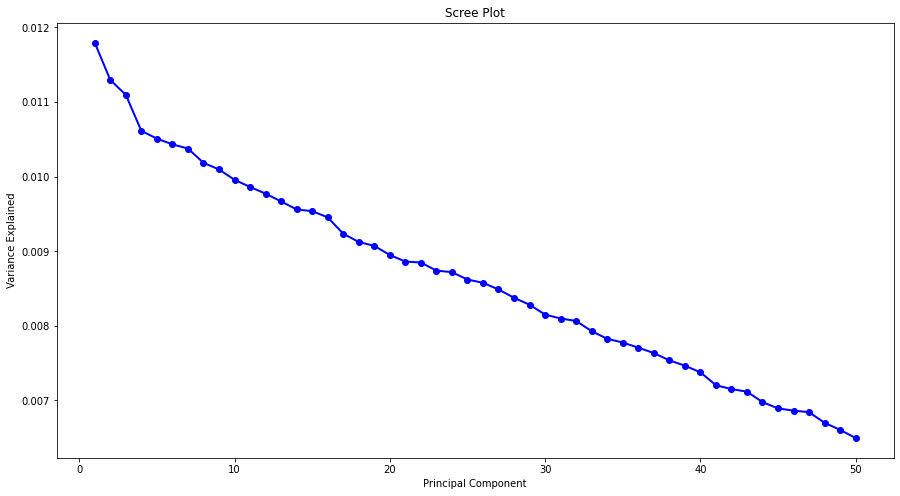

In [28]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## 모델링

In [30]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=37, random_state=0)
lgbm.fit(train_x,train_y)

lgbm_p_pred=lgbm.predict_proba(test_x)[:,1]
lgbm_b_pred=lgbm.predict(test_x)

p_score(test_y,lgbm_p_pred)
b_score(test_y,lgbm_b_pred)

auc_score : 0.9977999999999999 / logloss : 0.06942422315184814
precision : 0.9841897233201581 / recall : 0.996 / f1 score : 0.9900596421471173 /  acc : 0.9857142857142858


#### feature importance

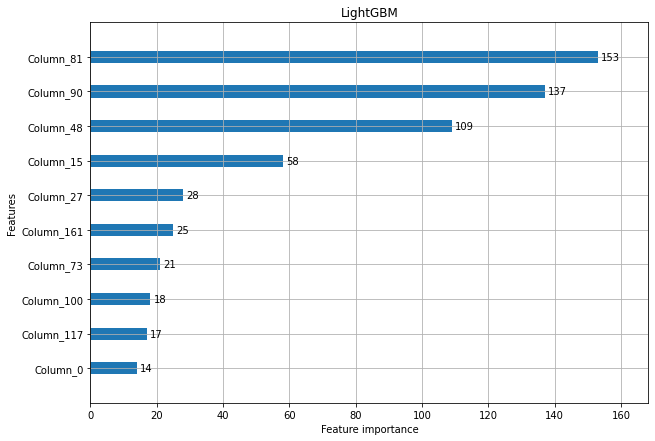

In [31]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10,7))
plot_importance(lgbm, max_num_features=10,title='LightGBM', height=0.35, ax=ax)
plt.show()

In [32]:
five_critical_columns=[15,27,48,81,90]

from lightgbm import LGBMClassifier
lgbm2 = LGBMClassifier(n_estimators=20, random_state=0)

lgbm2.fit(pd.DataFrame(train_x)[five_critical_columns],train_y)

lgbm_p_pred=lgbm2.predict_proba(pd.DataFrame(test_x)[five_critical_columns])[:,1]
lgbm_b_pred=lgbm2.predict(pd.DataFrame(test_x)[five_critical_columns])

p_score(test_y,lgbm_p_pred)
b_score(test_y,lgbm_b_pred)

auc_score : 0.9978400000000001 / logloss : 0.11211749073934767
precision : 0.984251968503937 / recall : 1.0 / f1 score : 0.9920634920634921 /  acc : 0.9885714285714285


#### XGBoost

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=40, random_state=0)
xgb.fit(train_x,train_y)

xgb_p_pred=xgb.predict_proba(test_x)[:,1]
xgb_b_pred=xgb.predict(test_x)

p_score(test_y,xgb_p_pred)
b_score(test_y,xgb_b_pred)

auc_score : 0.9974 / logloss : 0.10799211681155221
precision : 0.9765625 / recall : 1.0 / f1 score : 0.9881422924901185 /  acc : 0.9828571428571429


* featrue importance

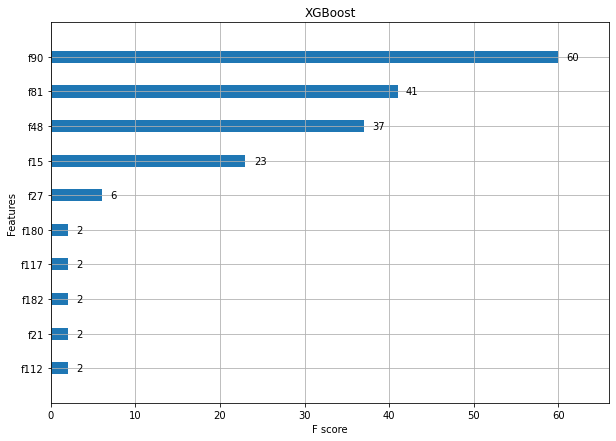

In [34]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,7))
plot_importance(xgb, max_num_features=10,title='XGBoost', height=0.35, ax=ax)
plt.show()

In [36]:
five_critical_columns=[15,27,48,81,90]

xgb2 = XGBClassifier(n_estimators=100, random_state=0) # 'device_type': 'gpu'

xgb2.fit(pd.DataFrame(train_x)[five_critical_columns],train_y)

xgb_p_pred=xgb2.predict_proba(pd.DataFrame(test_x)[five_critical_columns])[:,1]
xgb_b_pred=xgb2.predict(pd.DataFrame(test_x)[five_critical_columns])

p_score(test_y,xgb_p_pred)
b_score(test_y,xgb_b_pred)

auc_score : 0.99852 / logloss : 0.05834462119831837
precision : 0.9803921568627451 / recall : 1.0 / f1 score : 0.99009900990099 /  acc : 0.9857142857142858


#### CatBoost

In [37]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [38]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(n_estimators=120, random_state=0, depth=6, learning_rate=0.1) # 'task_type': 'GPU'
cat.fit(train_x,train_y, verbose=0)
cat_p_pred=cat.predict_proba(test_x)[:,1]
cat_b_pred=cat.predict(test_x)
p_score(test_y,cat_p_pred)
b_score(test_y,cat_b_pred)

auc_score : 0.99768 / logloss : 0.0834691269133756
precision : 0.9689922480620154 / recall : 1.0 / f1 score : 0.9842519685039369 /  acc : 0.9771428571428571


* feature importance

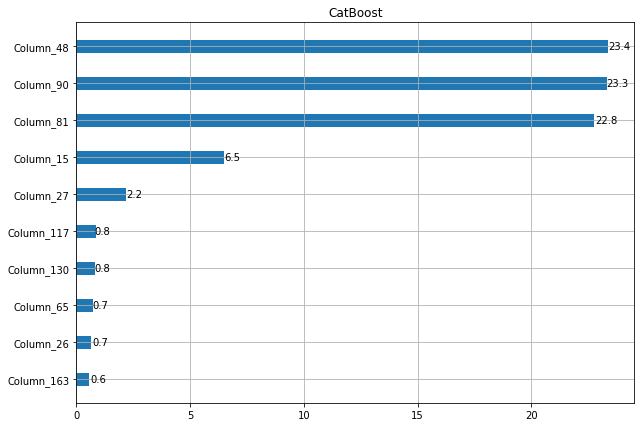

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
cat_importances=pd.Series(cat.feature_importances_,index=range(200)).sort_values(ascending=True)[-10:]
y=np.arange(10)
bars=ax.barh(y, cat_importances.values, height=0.35)
plt.yticks(y, ['Column_' + str(i) for i in cat_importances.index])
plt.grid()
plt.title('CatBoost')
for i, v in enumerate(np.round(cat_importances.values[-10:],1)):
    ax.text(v, i, str(v), va='center')
plt.show()

In [40]:
five_critical_columns=[15,27,48,81,90]

cat2 = CatBoostClassifier(n_estimators=150, random_state=0, learning_rate=0.1)

cat2.fit(pd.DataFrame(train_x)[five_critical_columns],train_y, verbose=0)

cat_p_pred=cat2.predict_proba(pd.DataFrame(test_x)[five_critical_columns])[:,1]
cat_b_pred=cat2.predict(pd.DataFrame(test_x)[five_critical_columns])

p_score(test_y,cat_p_pred)
b_score(test_y,cat_b_pred)

auc_score : 0.9981599999999999 / logloss : 0.05875269392480667
precision : 0.9881422924901185 / recall : 1.0 / f1 score : 0.9940357852882703 /  acc : 0.9914285714285714


In [41]:
from sklearn.metrics import classification_report
report = classification_report(test_y,cat_b_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
0.0            1.000000  0.970000  0.984772  100.000000
1.0            0.988142  1.000000  0.994036  250.000000
accuracy       0.991429  0.991429  0.991429    0.991429
macro avg      0.994071  0.985000  0.989404  350.000000
weighted avg   0.991530  0.991429  0.991389  350.000000